<a href="https://colab.research.google.com/github/Syilun/TibameAI04/blob/master/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow.keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test)= load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [3]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [4]:
trans = [
    "airplane",										
    "automobile",										
    "bird",										
    "cat",										
    "deer",										
    "dog",										
    "frog",										
    "horse",										
    "ship",										
    "truck"
]

dog


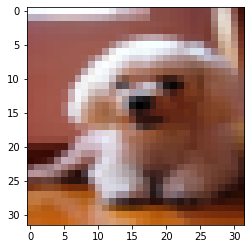

In [5]:
import random
import matplotlib.pyplot as plt
%matplotlib inline

i = random.randint(0, 49999)
print(trans[y_train[i][0]])
plt.imshow(x_train[i])


In [6]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout

layers = [
          Conv2D(64, 3, padding='same', activation='relu', input_shape=(32, 32, 3)),
          MaxPooling2D(),
          Conv2D(128, 3, padding='same', activation='relu'),
          MaxPooling2D(),
          Conv2D(256, 3, padding='same', activation='relu'),
          MaxPooling2D(),
          Flatten(),
          Dense(256, activation='relu'),
          Dropout(0.25),
          Dense(10, activation='softmax')
]
model = Sequential(layers)
model.summary()

# 使用時機: 預防看到不可預期的東西，看訓練與測試資料集差別的大小
# dropout，假設機率設為1/2，代表我在訓練時要花2倍的力量去訓練，故測試時要乘上1/2

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 256)         0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

In [7]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# 有SparseCategoricalCrossentropy不用做one-hot encoding，他會幫你做


In [8]:
x_train_norm = x_train / 255
x_test_norm = x_test / 255

In [9]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [
    ModelCheckpoint("cnn.h5", save_best_only=True),
    EarlyStopping(patience=5, restore_best_weights=True)       
]
model.fit(
    x_train_norm, 
    y_train, 
    batch_size=200,
    validation_split=0.1,
    epochs=50,
    callbacks=callbacks
    )

Epoch 1/50
225/225 [==============================] - 3s 15ms/step - loss: 1.8060 - accuracy: 0.3494 - val_loss: 1.3252 - val_accuracy: 0.5320
Epoch 2/50
225/225 [==============================] - 3s 14ms/step - loss: 1.2789 - accuracy: 0.5483 - val_loss: 1.2306 - val_accuracy: 0.5716
Epoch 3/50
225/225 [==============================] - 3s 14ms/step - loss: 1.0418 - accuracy: 0.6379 - val_loss: 0.9290 - val_accuracy: 0.6768
Epoch 4/50
225/225 [==============================] - 3s 14ms/step - loss: 0.8785 - accuracy: 0.6952 - val_loss: 0.8156 - val_accuracy: 0.7200
Epoch 5/50
225/225 [==============================] - 3s 14ms/step - loss: 0.7606 - accuracy: 0.7358 - val_loss: 0.8672 - val_accuracy: 0.7094
Epoch 6/50
225/225 [==============================] - 3s 14ms/step - loss: 0.6533 - accuracy: 0.7736 - val_loss: 0.7649 - val_accuracy: 0.7422
Epoch 7/50
225/225 [==============================] - 3s 14ms/step - loss: 0.5537 - accuracy: 0.8075 - val_loss: 0.8633 - val_accuracy: 0.7160

In [10]:
model.evaluate(x_test_norm, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.7274 - accuracy: 0.7552


[0.7273716926574707, 0.7552000284194946]